In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras import regularizers
f_data= pd.read_csv('/cardfrauddetection/creditcard.csv')

In [5]:
non_fraud=f_data[f_data["Class"]==0]
fraud = f_data[f_data["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [6]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [7]:
data = fraud.append(non_fraud, ignore_index=True)

data.shape
data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [8]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,110301.0,2.028465,-0.069629,-2.982541,-0.147440,2.681335,3.330134,-0.660284,0.754365,1.963272,...,-0.187782,-0.086500,0.092468,0.570371,0.104098,0.621481,-0.047826,-0.043874,1.00,0
980,122386.0,1.796815,0.925983,-1.848497,4.209096,1.069876,-0.037889,0.216769,0.064121,-0.973327,...,-0.042721,-0.015805,-0.039467,-0.671269,0.115548,0.101958,0.003139,0.009322,37.93,0
981,62990.0,-1.323032,-1.189912,0.122800,1.802340,0.303995,-0.840922,-1.207009,-3.004000,-0.734855,...,-0.783919,0.060719,-2.748485,0.564877,0.001795,-0.359843,0.118048,0.448567,650.00,0
982,36406.0,-0.313032,0.716847,1.643715,0.204422,-0.169986,-0.417944,1.054324,-0.369361,0.047881,...,-0.194430,-0.259440,-0.129281,0.434308,0.000683,0.187134,-0.271907,-0.218423,58.40,0


In [9]:
data = data.sample(frac=1).reset_index(drop=True)

In [10]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,148476.0,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,...,1.185580,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1
1,69110.0,-0.483122,0.488286,1.710328,-0.006411,0.411110,-0.244544,0.821259,-0.501247,0.583578,...,-0.105334,0.197970,-0.380475,-0.055530,-0.214550,0.410640,-0.464922,-0.331842,12.95,0
2,56624.0,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,-4.542447,...,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,153.46,1
3,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
4,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
980,27163.0,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,-3.819832,...,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,99.99,1
981,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
982,37361.0,-5.196537,4.293441,0.197380,-2.689008,-0.530123,-1.256238,1.445693,-0.935703,5.094323,...,-1.064590,-0.465894,-0.008684,0.329567,0.529765,0.552402,0.605785,-0.705716,1.00,0


In [11]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]


In [12]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [13]:
train_data.shape, test_data.shape

((688, 30), (296, 30))


Normalizing the data

In [14]:

mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [15]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
239,-0.741462,0.622847,-0.573945,0.761604,-0.477882,0.148325,0.597152,0.328093,0.014679,0.878847,...,-0.340874,-0.113348,0.160197,0.086980,0.560131,0.106851,0.585909,-0.038652,-0.070966,-0.412219
917,-0.979571,0.677649,-0.634240,0.518412,-1.001013,0.271964,0.137346,0.404539,-0.054278,0.090877,...,-0.266099,-0.154723,-0.462226,0.083149,-0.568080,0.423000,-0.941979,-0.086333,-0.135285,-0.410264
736,-1.427781,-2.231390,1.299856,-2.299473,2.864707,-0.603971,-1.552759,-2.359764,-0.372638,-2.407303,...,0.855667,-1.072665,0.315732,-2.806992,-1.349607,0.163819,1.504825,2.552874,-2.568960,-0.454988
146,-0.823920,0.368208,-0.603028,0.878929,-1.096352,0.042514,0.465757,0.433582,-0.045337,0.193211,...,-0.276931,-0.132896,0.147960,0.143752,-0.093684,-0.541399,2.232606,-0.078928,-0.017608,0.053760
11,-1.654188,0.426907,0.646617,-0.453808,1.404827,0.560291,-1.541822,0.188724,-0.029621,-0.648603,...,0.264965,0.028207,-0.541766,-0.401572,0.319820,2.101291,0.986835,0.646509,1.162242,-0.454988


In [16]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

# Building The Network

In [18]:
model= models.Sequential()
model.add(layers.Dense(20, activation="tanh", input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

# Training The Network

In [19]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
18/18 [==============================] - 1s 37ms/step - loss: 0.6391 - accuracy: 0.5709 - val_loss: 0.5845 - val_accuracy: 0.7609
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.6855 - val_loss: 0.5358 - val_accuracy: 0.8406
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7745 - val_loss: 0.5001 - val_accuracy: 0.8406
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.7673 - val_loss: 0.4701 - val_accuracy: 0.8551
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7891 - val_loss: 0.4380 - val_accuracy: 0.8551
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.8255 - val_loss: 0.4046 - val_accuracy: 0.8623
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8291 - val_loss: 0.3758 - val_accuracy: 0.8768
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1680 - accuracy: 0.9418 - val_loss: 0.2224 - val_accuracy: 0.9130
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1917 - accuracy: 0.9382 - val_loss: 0.2232 - val_accuracy: 0.9130
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9382 - val_loss: 0.2303 - val_accuracy: 0.9058
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.9364 - val_loss: 0.2340 - val_accuracy: 0.9130
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9418 - val_loss: 0.2312 - val_accuracy: 0.9203
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.9491 - val_loss: 0.2319 - val_accuracy: 0.9203
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9509 - val_loss: 0.2360 - val_accuracy: 0.9203
Epoch 

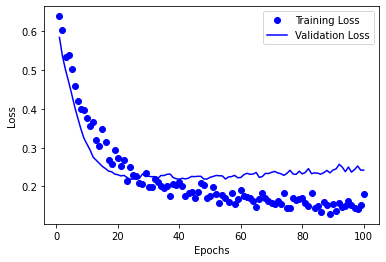

In [20]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

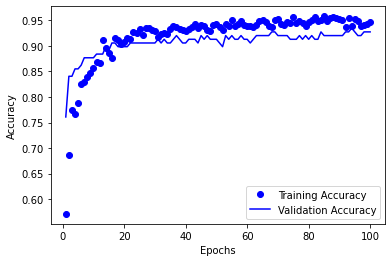

In [21]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluating the Network

In [22]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.2068 - accuracy: 0.9459


In [23]:

test_acc_score *100

94.59459185600281

# Predicting the values

In [24]:
prediction=model.predict(test_data).astype(dtype="u8")

In [25]:
pred=prediction[30:40]

In [26]:
testd=test_labels[30:40]

In [27]:
print(pred==testd)

[[ True  True False False False False False  True False  True]
 [ True  True False False False False False  True False  True]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [ True  True False False False False False  True False  True]
 [False False  True  True  True  True  True False  True False]
 [ True  True False False False False False  True False  True]]
